In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the train and test datasets into the environment

## Train dataset

In [117]:
train_data=pd.read_csv(r"C:\Users\Priya\Documents\Internship_TcsIon\MobileDataSets\MobileTrain.csv")
train_data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [118]:
pd.set_option('display.max_columns', None)
train_data.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1


### Understanding the dataset

In [119]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

The attributes need to be explained to better understand the dataset. <br>
1. battery_power: Measured in mAh - It is the energy capacity of the battery.
2. blue: Whether the phone has bluetooth connectivity or not.
3. clock_speed: Clock Speed determines how quickly and efficiently the processor can retrieve and execute the instructions.
4. dual_sim: Whether the phone supports dual sim.
5. fc: Megapixel of front camera.
6. four_g: Whether the phone supports 4G connectivity.
7. int_memory: Capacity of internal memory measured in gigabytes.
8. m_depth: Depth of mobile phone (Attribute not clear)
9. mobile_wt: Weight of the mobile phone in grams.
10. n_cores: Number of cores the processor has.
11. pc: Megapixel of primary camera.
12. px_height: Height of pixel resolution of the mobile.
13. px_width: Width of pixel resolution of the mobile.
14. ram: Random Access Memory (measured in MB).
15. sc_h: Mobile screen height(measured in cm).
16. sc_w: Mobile screen width(measured in cm).
17. talk_time: How long can a battery last in one full charge.
18. three_g: Whether the phone supports 3G connectivity.
19. touch_screen: Whether the phone is touch screen or not.
20. wifi: Whether the phone has WiFi or not.
21. price_range: Price range of the phone (to be taken as the target variable).

In [120]:
train_data['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

The target variable takes 4 different values <br>
1. 0 - Low cost phone
2. 1 - Budget phone
3. 2 - Mid range phone
4. 3 - High end phone

### Basic statistics of train dataset 

In [121]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [122]:
train_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values in the dataset. Columns clock_speed and m_depth has floating point values while others has integer values.

In [123]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Exploratory Data Analysis

### Univariate Data Analysis 

Each variable is taken seperately and plotted to understand its distribution and other features.

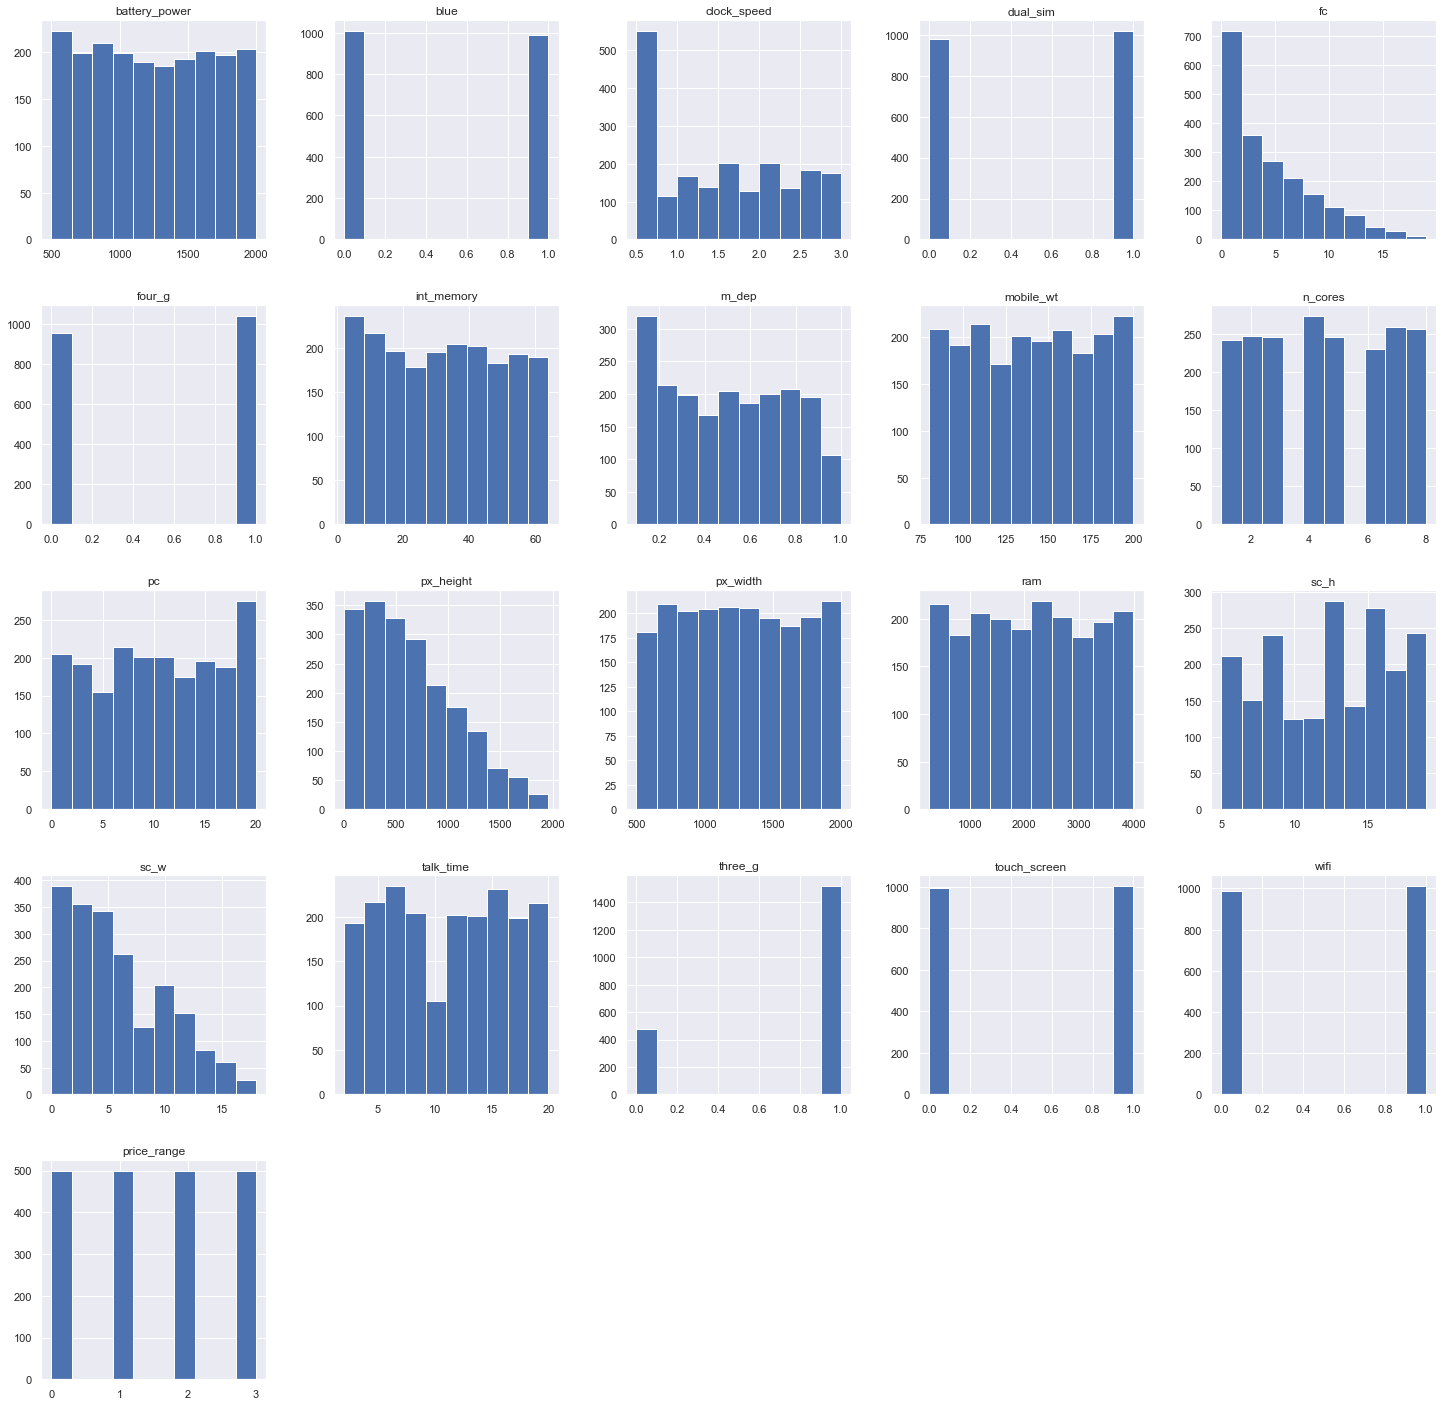

<Figure size 1080x1440 with 0 Axes>

In [124]:
train_data.hist(sharex=False, sharey=False, figsize=(25,25) )
fig = plt.figure(figsize = (15,20))
plt.show()

Features like bluetooth, 4G, dual sim, 3G, touch screen and wifi has only two outcomes(Boolean data). It can either be true or false. <br>
<br>
Emphasis should be given to other features and their distribution should be understood.

<AxesSubplot:xlabel='battery_power', ylabel='Density'>

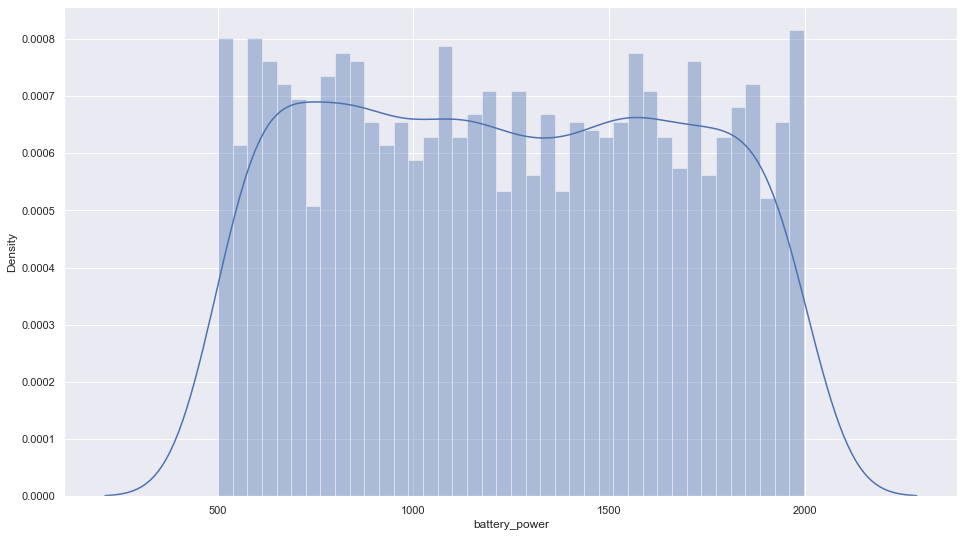

In [125]:
plt.figure(figsize=(16,9))
sns.set()
sns.distplot(train_data.battery_power, bins=40, kde=True)

<AxesSubplot:xlabel='clock_speed', ylabel='Density'>

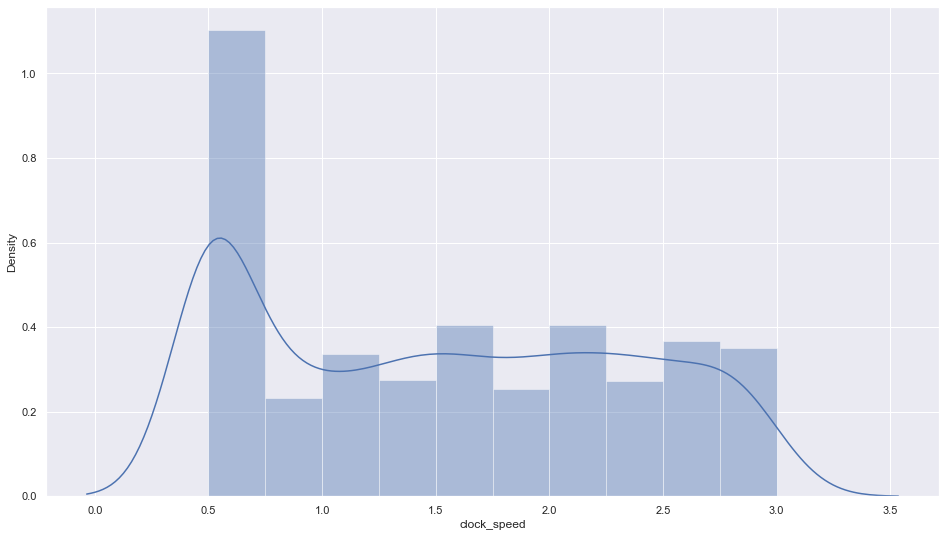

In [126]:
plt.figure(figsize=(16,9))
sns.set()
sns.distplot(train_data.clock_speed, bins=10, kde=True)

<AxesSubplot:xlabel='fc', ylabel='Density'>

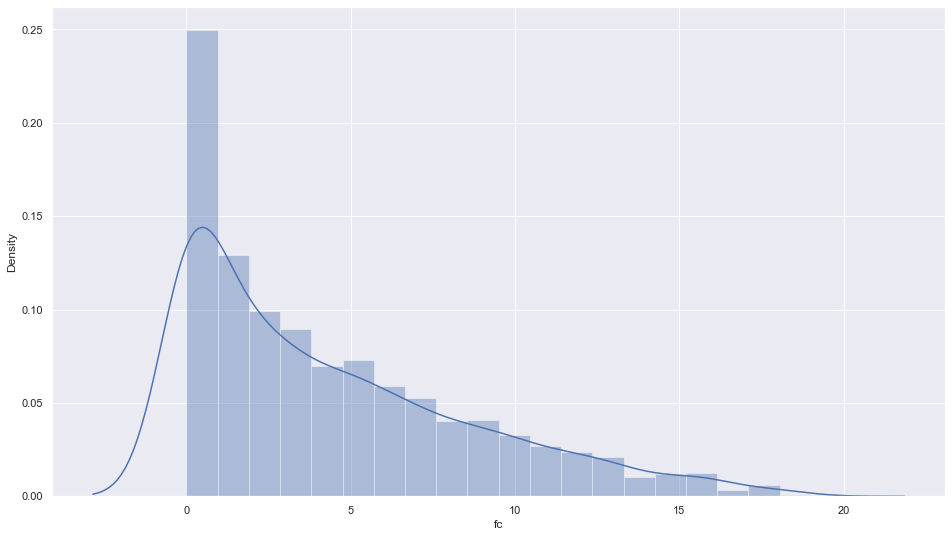

In [127]:
plt.figure(figsize=(16,9))
sns.set()
sns.distplot(train_data.fc, bins=20, kde=True)

<AxesSubplot:xlabel='int_memory', ylabel='Density'>

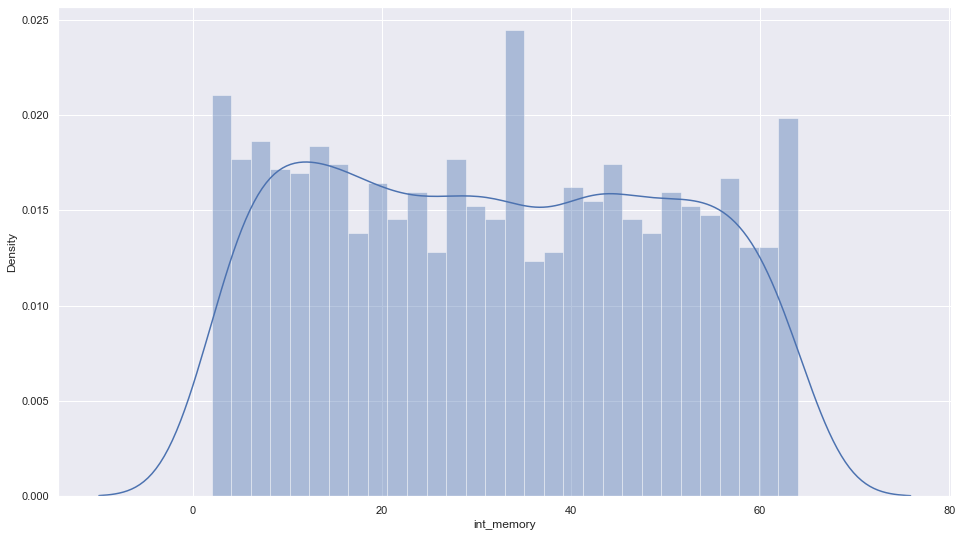

In [128]:
plt.figure(figsize=(16,9))
sns.set()
sns.distplot(train_data.int_memory, bins=30, kde=True)

<AxesSubplot:xlabel='m_dep', ylabel='Density'>

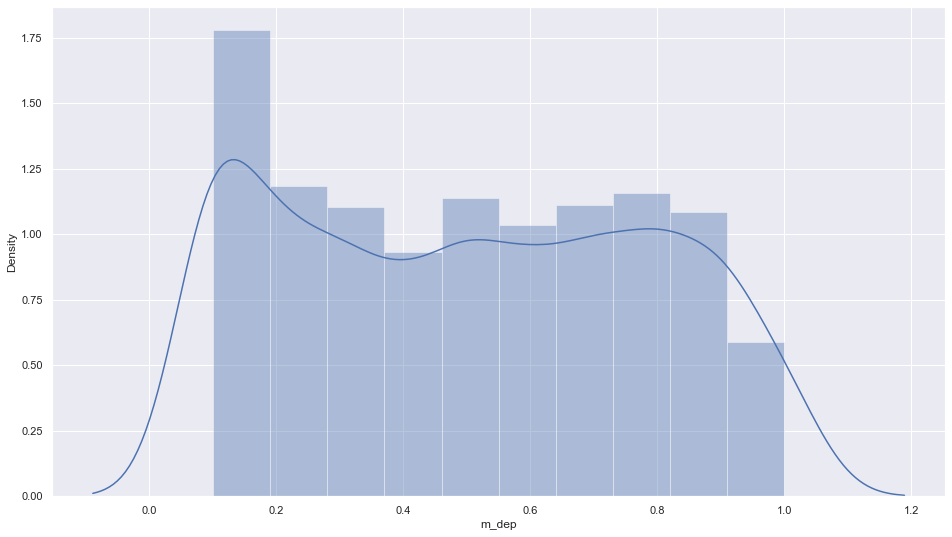

In [129]:
plt.figure(figsize=(16,9))
sns.set()
sns.distplot(train_data.m_dep, bins=10, kde=True)

<AxesSubplot:xlabel='mobile_wt', ylabel='Density'>

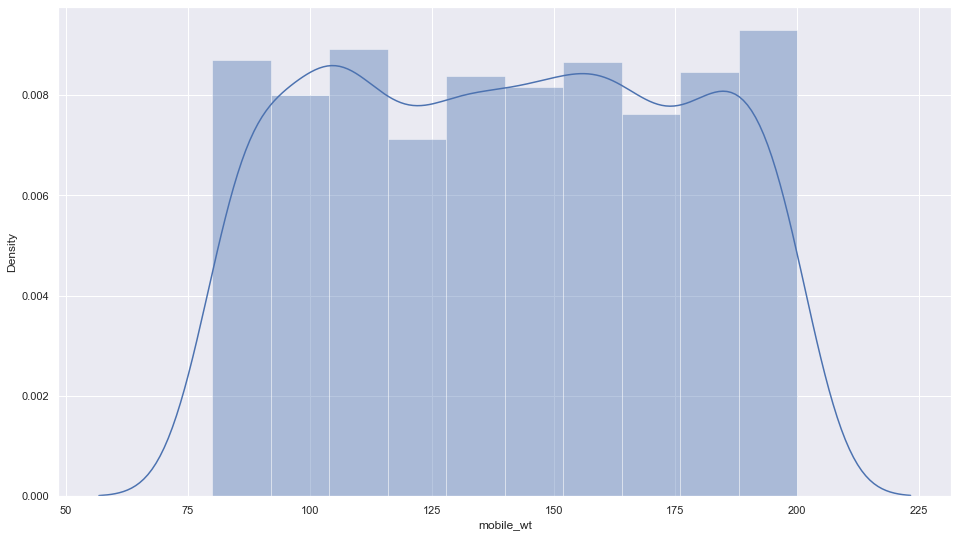

In [130]:
plt.figure(figsize=(16,9))
sns.set()
sns.distplot(train_data.mobile_wt, bins=10, kde=True)

<AxesSubplot:xlabel='pc', ylabel='Density'>

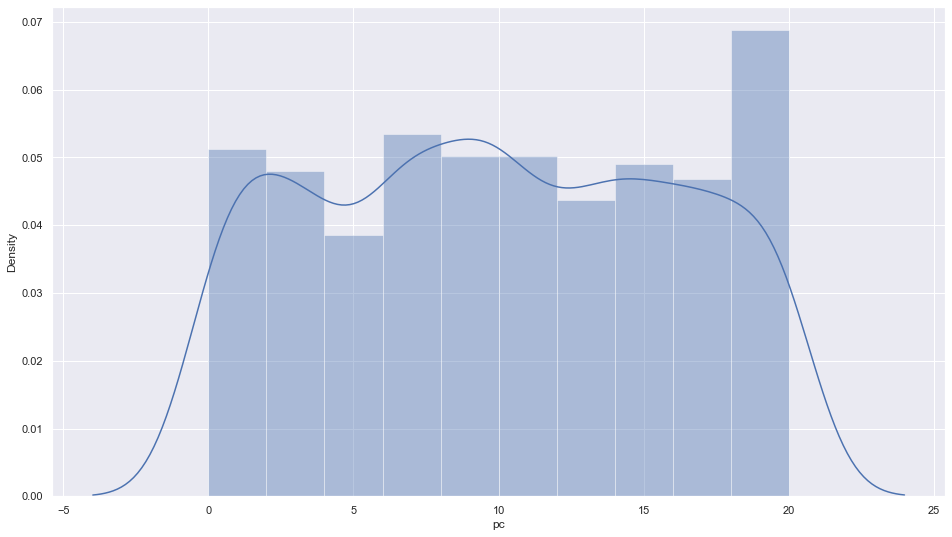

In [131]:
plt.figure(figsize=(16,9))
sns.set()
sns.distplot(train_data.pc, bins=10, kde=True)

<AxesSubplot:xlabel='px_height', ylabel='Density'>

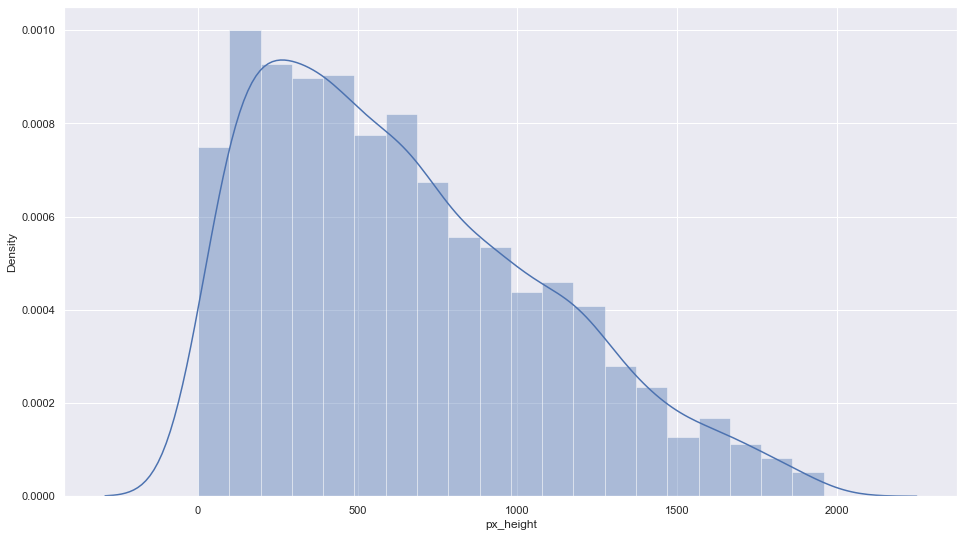

In [132]:
plt.figure(figsize=(16,9))
sns.set()
sns.distplot(train_data.px_height, bins=20, kde=True)

<AxesSubplot:xlabel='px_width', ylabel='Density'>

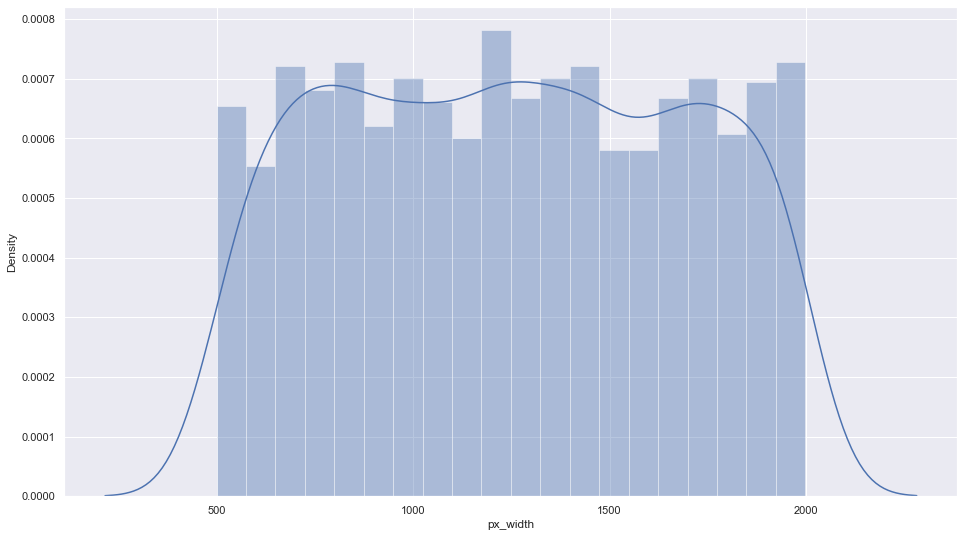

In [133]:
plt.figure(figsize=(16,9))
sns.set()
sns.distplot(train_data.px_width, bins=20, kde=True)

<AxesSubplot:xlabel='ram', ylabel='Density'>

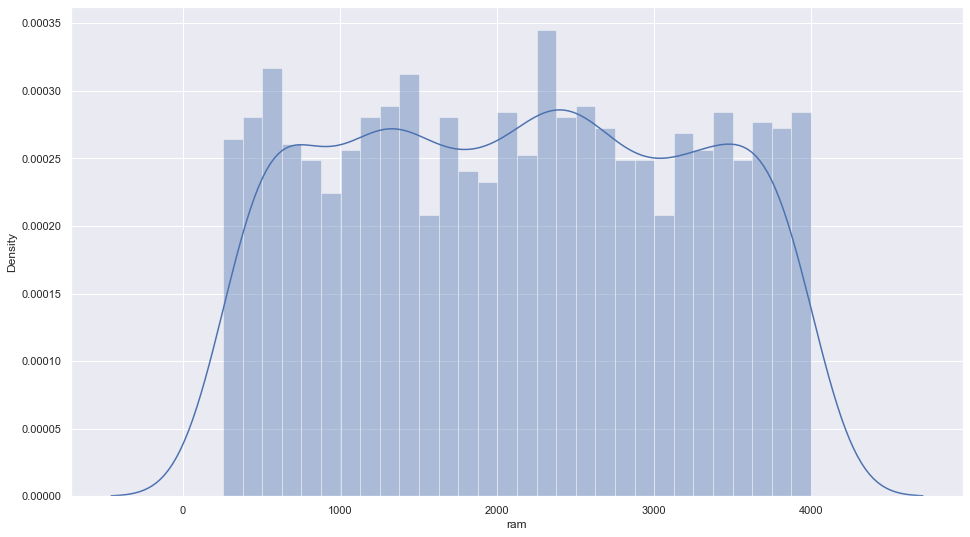

In [134]:
plt.figure(figsize=(16,9))
sns.set()
sns.distplot(train_data.ram, bins=30, kde=True)

<AxesSubplot:xlabel='sc_h', ylabel='Density'>

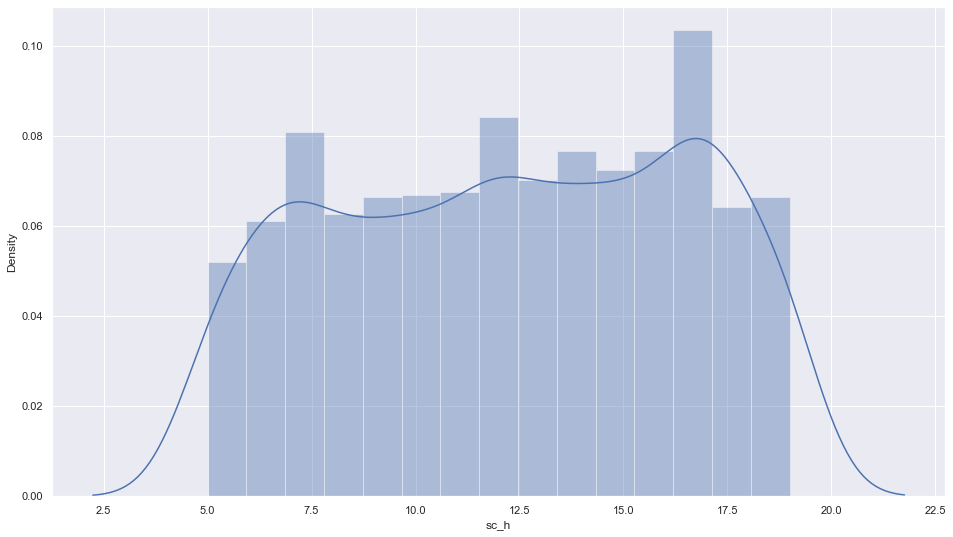

In [135]:
plt.figure(figsize=(16,9))
sns.set()
sns.distplot(train_data.sc_h, bins=15, kde=True)

<AxesSubplot:xlabel='sc_w', ylabel='Density'>

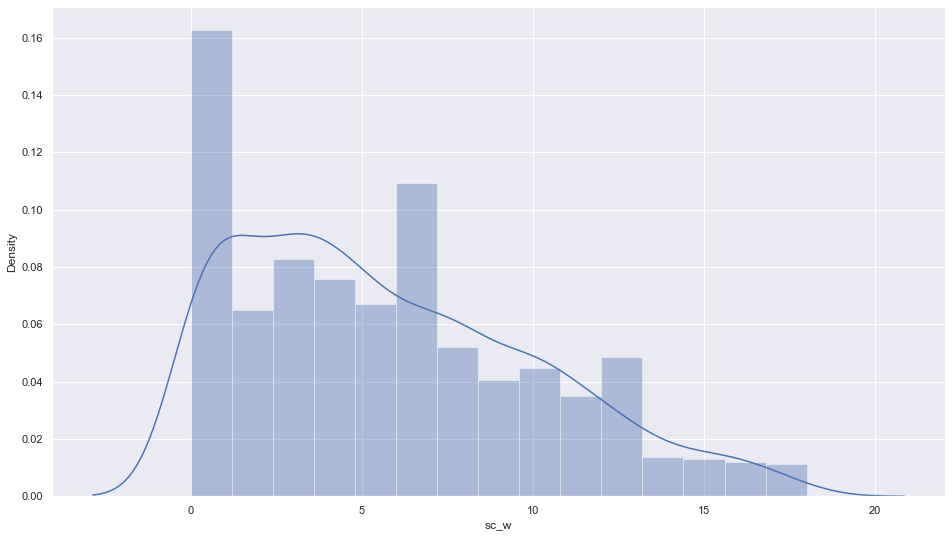

In [136]:
plt.figure(figsize=(16,9))
sns.set()
sns.distplot(train_data.sc_w, bins=15, kde=True)

<AxesSubplot:xlabel='talk_time', ylabel='Density'>

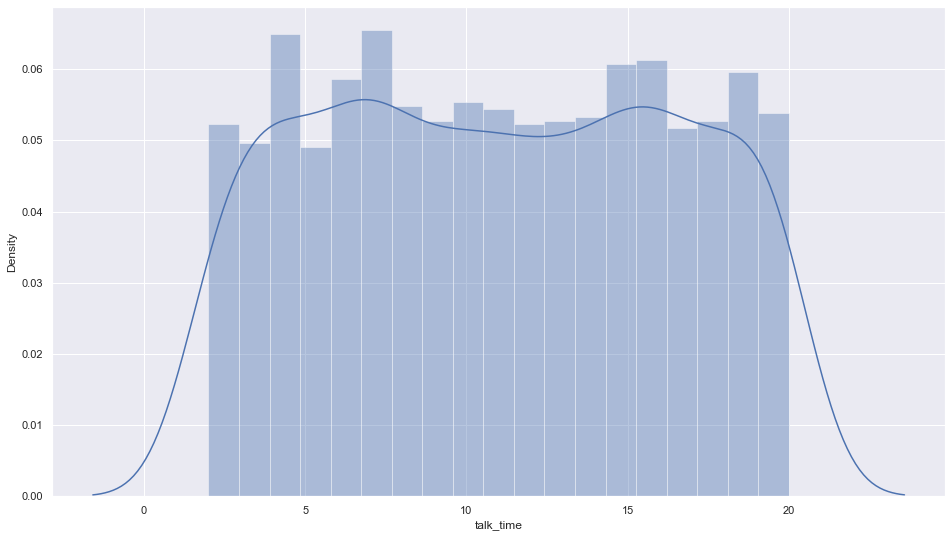

In [137]:
plt.figure(figsize=(16,9))
sns.set()
sns.distplot(train_data.talk_time, bins=19, kde=True)

The above plots can also be plotted using a for loop but for the convenience of giving individual bin numbers, they are plotted by using the distplot code repeatedly instead of the for loop.

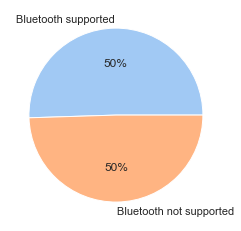

In [138]:
data = train_data['blue'].value_counts().values
labels = ['Bluetooth supported', 'Bluetooth not supported']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

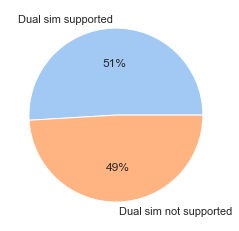

In [139]:
data = train_data['dual_sim'].value_counts().values
labels = ['Dual sim supported', 'Dual sim not supported']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

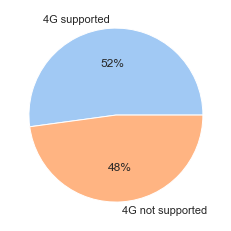

In [140]:
data = train_data['four_g'].value_counts().values
labels = ['4G supported', '4G not supported']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

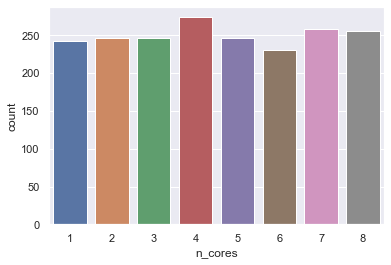

In [141]:
sns.countplot(x=train_data['n_cores'])
plt.show()

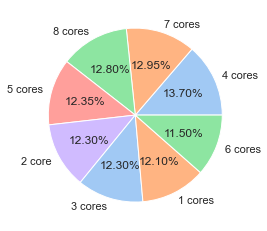

In [142]:
data = train_data['n_cores'].value_counts().values
labels = ['4 cores', '7 cores', '8 cores', '5 cores', '2 core', '3 cores', '1 cores', '6 cores']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

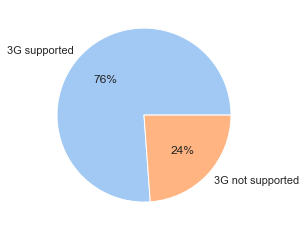

In [143]:
data = train_data['three_g'].value_counts().values
labels = ['3G supported', '3G not supported']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

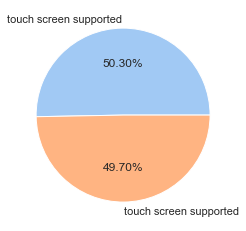

In [144]:
data = train_data['touch_screen'].value_counts().values
labels = ['touch screen supported', 'touch screen supported']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

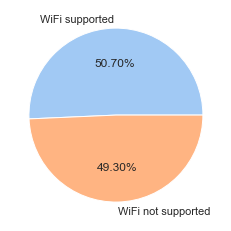

In [145]:
data = train_data['wifi'].value_counts().values
labels = ['WiFi supported', 'WiFi not supported']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

## Bivariate analysis 

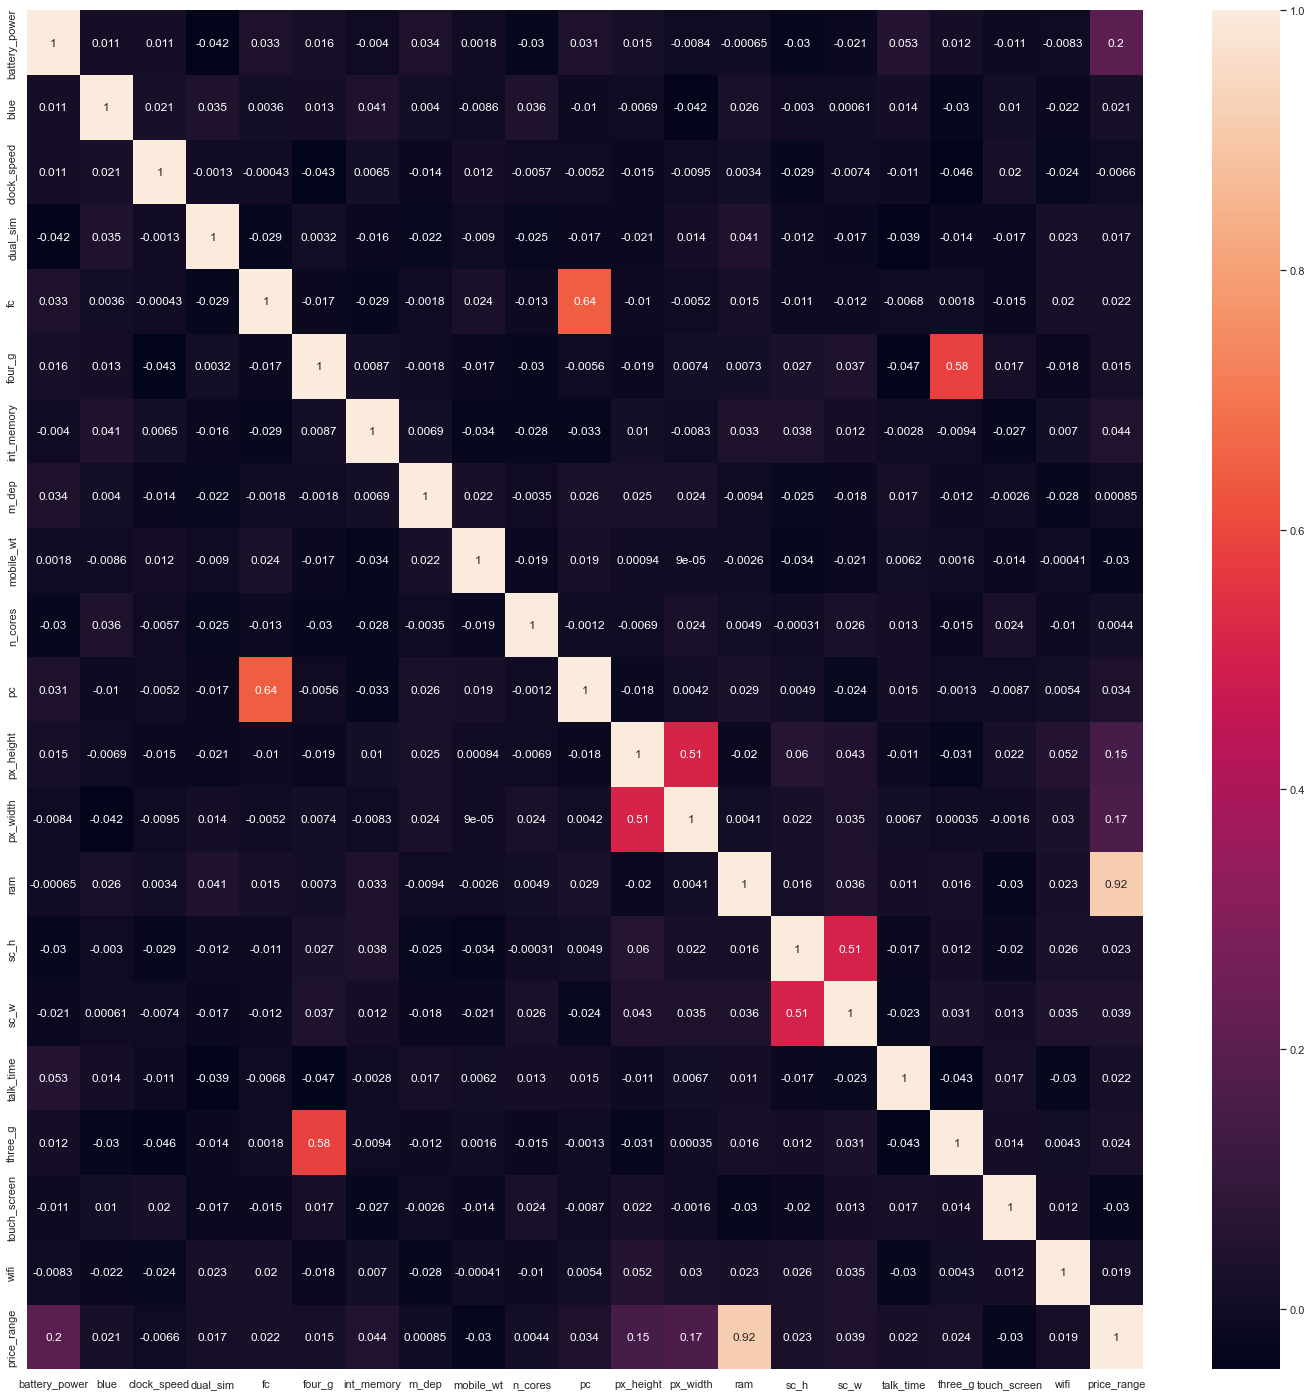

In [146]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(train_data.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='price_range', ylabel='ram'>

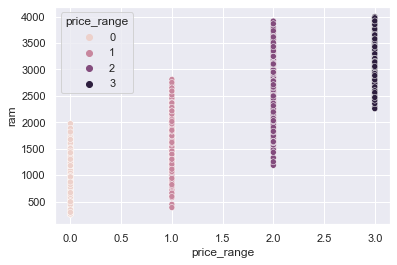

In [147]:
sns.scatterplot(data=train_data, x="price_range", y="ram", hue="price_range")

<AxesSubplot:xlabel='price_range', ylabel='ram'>

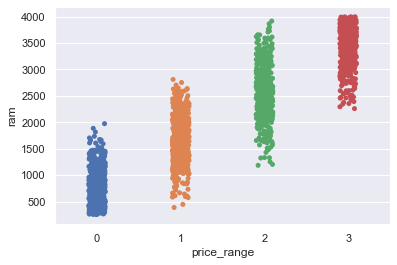

In [148]:
sns.stripplot(x="price_range" , y="ram" , data=train_data)

From the correlation value and above plots, it is very clear that price range is highly correlated to ram.

Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

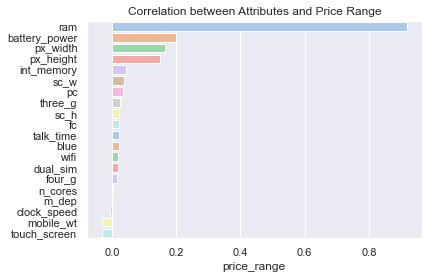

In [149]:
corr = train_data.corr()
corr = corr.price_range
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "pastel")
plt.title("Correlation between Attributes and Price Range")

### Outlier Handling 

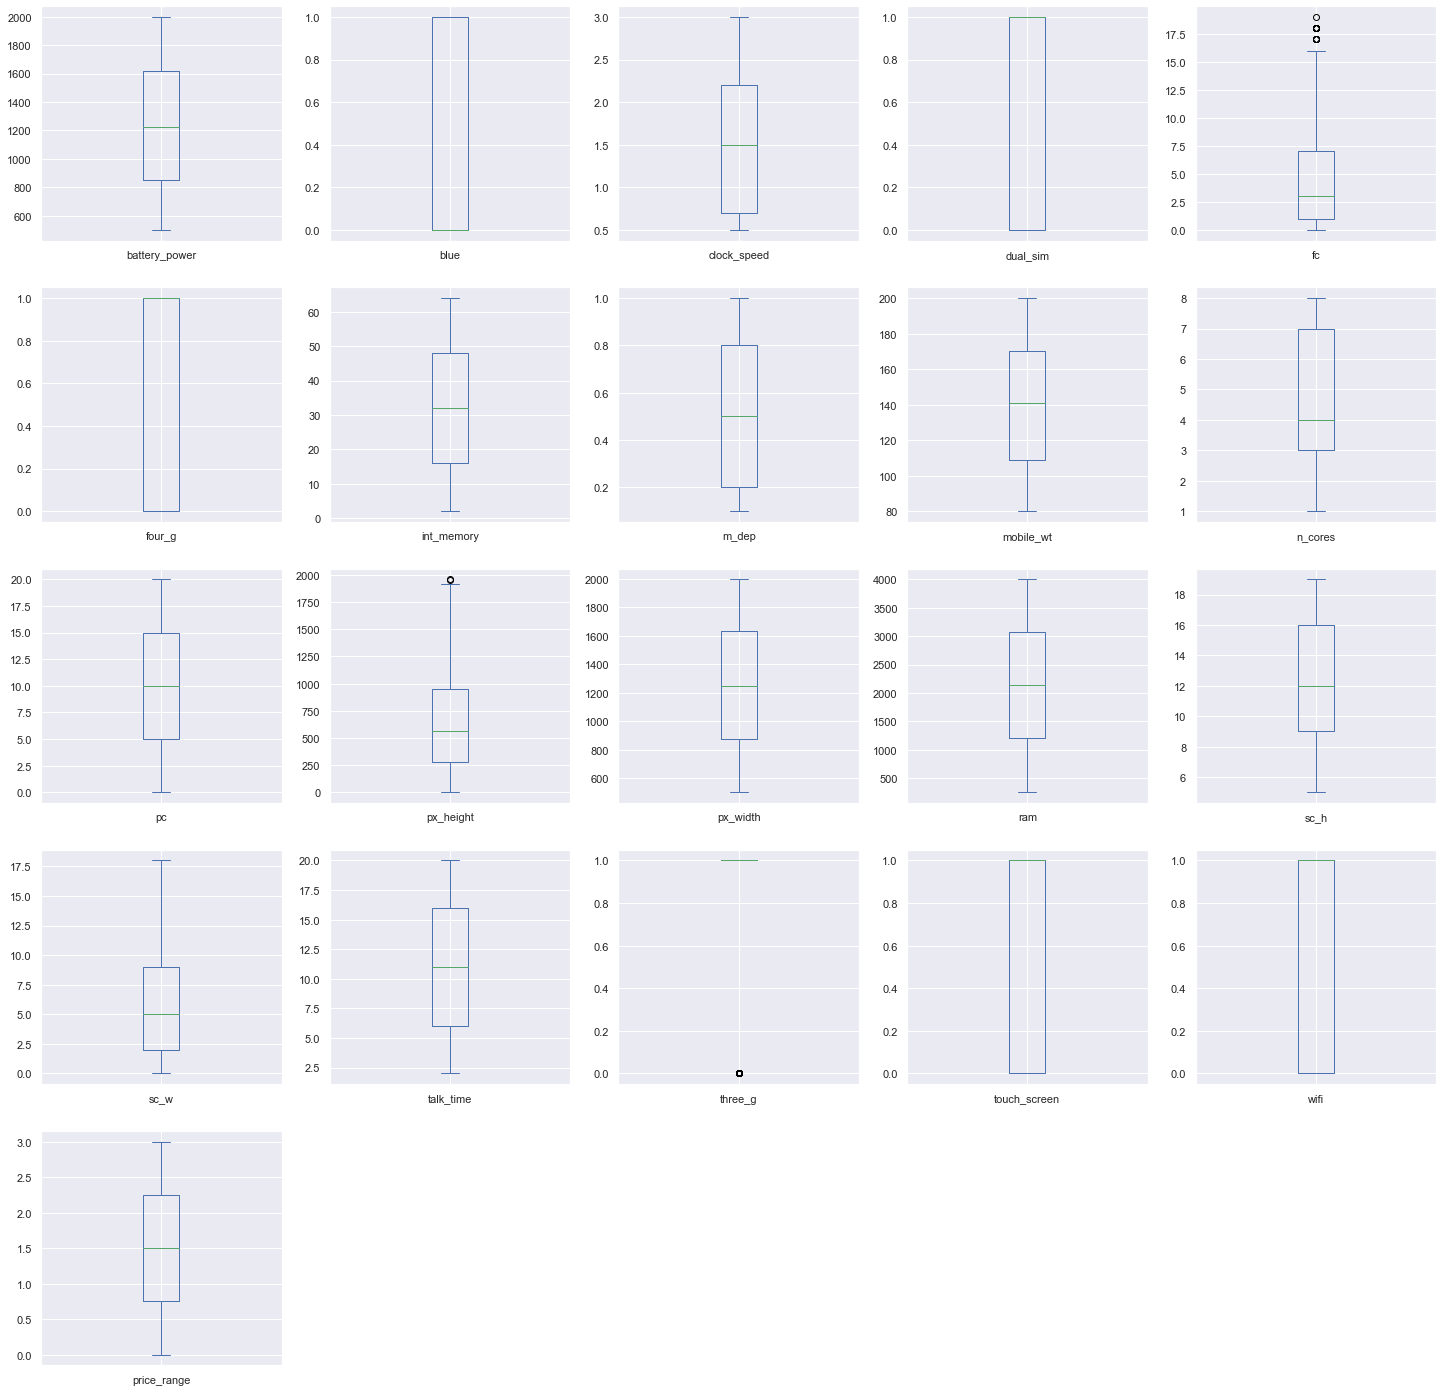

In [150]:
train_data.plot(kind="box",subplots=True,layout=(5,5),figsize=(25,25))
plt.show()

Outliers are detected only in front camera and px_height attributes.

In [151]:
data1=train_data

In [168]:
data1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,rank_by_ncores,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,1635.0,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,1388.5,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,868.5,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,630.5,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,1635.0,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


### Ranking Features of the smartphone

The target variable is ranked first and sorted.

In [154]:
train_data["rank_by_price"]=train_data["price_range"].rank()
data_train_rank=train_data
data_train_rank

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,250.5


In [155]:
data_train_rank["rank_by_price"]=data_train_rank["rank_by_price"].sort_values()
data_train_rank.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1250.5


In [156]:
data_train_rank.sort_values(by=["rank_by_price"]).head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,14,366,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,15,119,529,1082,15,5,10,1,0,1,0,250.5


Other attributes have to be ranked seperately to get the correct output.

In [157]:
train_rank = data_train_rank
train_rank["rank_by_price"] = train_rank["price_range"].rank()
train_rank["rank_by_battery"] = train_rank["battery_power"].rank(ascending=False)
train_rank["rank_by_blueooth"] = train_rank["blue"].rank(ascending=False)
train_rank["rank_by_clockspeed"] = train_rank["clock_speed"].rank(ascending=False)
train_rank["rank_by_DualSIM"] = train_rank["dual_sim"].rank(ascending=False)
train_rank["rank_by_fc"] = train_rank["fc"].rank(ascending=False)
train_rank["rank_by_4G"] = train_rank["four_g"].rank(ascending=False)
train_rank["rank_by_InternalMemory"] = train_rank["int_memory"].rank(ascending=False)
train_rank["rank_by_mdep"] = train_rank["m_dep"].rank(ascending=False)
train_rank["rank_by_weight"] = train_rank["mobile_wt"].rank(ascending=True)
train_rank["rank_by_ncores"] = train_rank["n_cores"].rank(ascending=False)
train_rank["rank_by_pc"] = train_rank["pc"].rank(ascending=False)
train_rank["rank_by_height"] = train_rank["px_height"].rank(ascending=False)
train_rank["rank_by_width"] = train_rank["px_width"].rank(ascending=False)
train_rank["rank_by_ram"] = train_rank["ram"].rank(ascending=False)
train_rank["rank_by_sch"] = train_rank["sc_h"].rank(ascending=False)
train_rank["rank_by_scw"] = train_rank["sc_w"].rank(ascending=False)
train_rank["rank_by_talktime"] = train_rank["talk_time"].rank(ascending=False)
train_rank["rank_by_3G"] = train_rank["three_g"].rank(ascending=False)
train_rank["rank_by_touchscreen"] = train_rank["touch_screen"].rank(ascending=False)
train_rank["rank_by_wifi"] = train_rank["wifi"].rank(ascending=False)
train_rank.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,rank_by_ncores,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,1635.0,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,1388.5,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5


Take the ranked columns out of the dataset to create the ranked dataset.

In [158]:
data_ranked= train_rank.iloc[:,21:]
data_ranked.head()

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,rank_by_ncores,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,1635.0,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,1388.5,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,868.5,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,630.5,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,1635.0,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


#### From here, two approaches can be taken to build a model.
#### 1. Take the original dataset and use price_range as the target variable.
#### 2. Take the rank_by_price as target variable and build a model to predict the rank.

#### Since the first approach gives a relevant model as far as the customer is concerned, the model is built using the first approach.

## Building the model 

In [173]:
data1.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'rank_by_price',
       'rank_by_battery', 'rank_by_blueooth', 'rank_by_clockspeed',
       'rank_by_DualSIM', 'rank_by_fc', 'rank_by_4G', 'rank_by_InternalMemory',
       'rank_by_mdep', 'rank_by_weight', 'rank_by_ncores', 'rank_by_pc',
       'rank_by_height', 'rank_by_width', 'rank_by_ram', 'rank_by_sch',
       'rank_by_scw', 'rank_by_talktime', 'rank_by_3G', 'rank_by_touchscreen',
       'rank_by_wifi'],
      dtype='object')

In [181]:
data2=data1.drop(["rank_by_price" , "rank_by_battery" , "rank_by_blueooth" , "rank_by_clockspeed" ,"rank_by_DualSIM" , "rank_by_fc" , "rank_by_4G" , "rank_by_InternalMemory" ,"rank_by_mdep" , "rank_by_weight" , "rank_by_ncores" , "rank_by_pc" ,"rank_by_height" , "rank_by_width" , "rank_by_ram" , "rank_by_sch" ,"rank_by_scw" , "rank_by_talktime" , "rank_by_3G" , "rank_by_touchscreen" ,"rank_by_wifi"], axis=1)

In [182]:
X=data2.drop("price_range" , axis=1)
Y=data2["price_range"]

In [183]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [184]:
X.shape

(2000, 20)

In [185]:
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [186]:
Y.shape

(2000,)

#### Data splitting

In [187]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =0)

In [188]:
x_train.shape

(1600, 20)

In [189]:
x_test.shape

(400, 20)

#### Feature Scaling 

In [190]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
col = data1.iloc[:,:20].columns
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

#### Machine learning algorithms

#### The following ML alogirthms will be compared to find out the best one and it'll be used to build the final model

#### 1. Logistic Regression
#### 2. Desicion Trees
#### 3. Random Forest
#### 4. Support Vector Machine
#### 5. Gradient Boost Classifier
#### 6. XGBoost Classifier
#### 7. Gaussian Naive Bayes Classifier

## ---------------------------------------------------------------------------------------------------------------------------------- 

In [191]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Logistic Regression Model 

In [192]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr_model.fit(x_train , y_train)
y_pred_lr = lr_model.predict(x_test)
print("Logistic Regression: Results")
lr_result = classification_report(y_pred_lr,y_test,output_dict=True)
lr_result = pd.DataFrame(lr_result).transpose()
lr_result.style.background_gradient(cmap="twilight_shifted")

Logistic Regression: Results


,precision,recall,f1-score,support
0,0.989474,0.959184,0.974093,98.000000
1,0.956522,0.830189,0.888889,106.000000
2,0.818182,0.870968,0.843750,93.000000
3,0.894737,0.990291,0.940092,103.000000
accuracy,0.912500,0.912500,0.912500,0.912500
macro avg,0.914729,0.912658,0.911706,400.000000
weighted avg,0.916521,0.912500,0.912454,400.000000


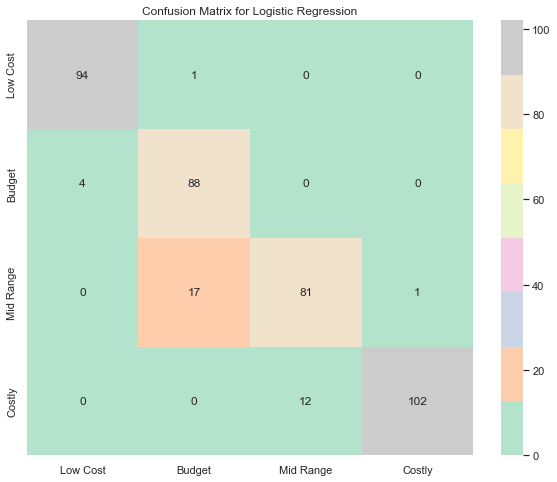

In [193]:
cm = confusion_matrix(y_test, y_pred_lr)
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budget", "Mid Range", "Costly"],index=["Low Cost", "Budget", "Mid Range", "Costly"])
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Pastel2")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [194]:
y_pred_lr

array([3, 0, 2, 1, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 1, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 1, 0, 3, 3, 1, 2, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 1, 1,
       2, 3, 1, 2, 2, 0, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 1, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 1, 3, 3, 0,
       1, 2, 3, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 3, 1, 1, 0, 2, 2, 0, 1, 2,
       2, 0, 3, 3, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 3, 0, 2, 0, 1,

## Decision Tree Classifier 

In [195]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
print("Decision Tree Classifier : Results")
dt_result = classification_report(y_pred_dt,y_test,output_dict=True)
dt_result = pd.DataFrame(dt_result).transpose()
dt_result.style.background_gradient(cmap="twilight_shifted")

Decision Tree Classifier : Results


,precision,recall,f1-score,support
0,0.947368,0.927835,0.937500,97.000000
1,0.869565,0.800000,0.833333,100.000000
2,0.747475,0.787234,0.766839,94.000000
3,0.868421,0.908257,0.887892,109.000000
accuracy,0.857500,0.857500,0.857500,0.857500
macro avg,0.858207,0.855831,0.856391,400.000000
weighted avg,0.859429,0.857500,0.857835,400.000000


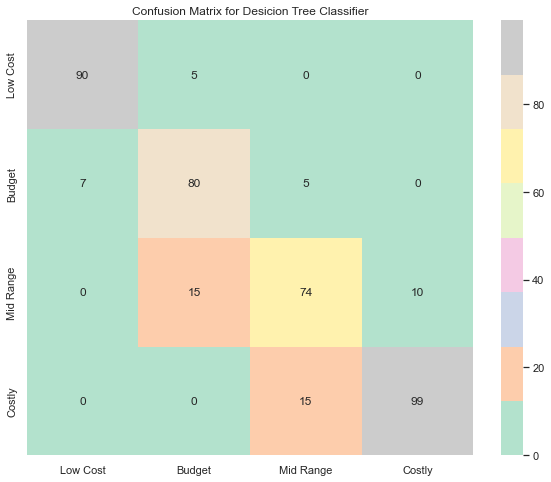

In [196]:
cm = confusion_matrix(y_test, y_pred_dt)
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budget", "Mid Range", "Costly"],index=["Low Cost", "Budget", "Mid Range", "Costly"])
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Pastel2")
plt.title("Confusion Matrix for Desicion Tree Classifier")
plt.show()

In [197]:
y_pred_dt

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 1, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 0, 3, 0, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 3, 2, 3, 2,
       1, 3, 0, 1, 3, 1, 0, 3, 0, 3, 0, 2, 3, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 1, 3, 3, 2, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 2, 2, 3, 0, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 3, 0, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 3, 1, 3, 0, 2, 3, 1, 1, 1, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 3, 1, 2, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       2, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 3, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 2, 2, 1, 3, 3, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       3, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 1, 0, 1,

## Random Forest Classifier

In [198]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train) 
y_pred_rf =rf_model.predict(x_test)
print("Random Forest Classifier : Results")
RF_result = classification_report(y_pred_rf,y_test,output_dict=True)
RF_result = pd.DataFrame(RF_result).transpose()
RF_result.style.background_gradient(cmap="twilight_shifted")

Random Forest Classifier : Results


,precision,recall,f1-score,support
0,0.989474,0.921569,0.954315,102.000000
1,0.880435,0.750000,0.810000,108.000000
2,0.737374,0.839080,0.784946,87.000000
3,0.903509,1.000000,0.949309,103.000000
accuracy,0.877500,0.877500,0.877500,0.877500
macro avg,0.877698,0.877662,0.874642,400.000000
weighted avg,0.883065,0.877500,0.877223,400.000000


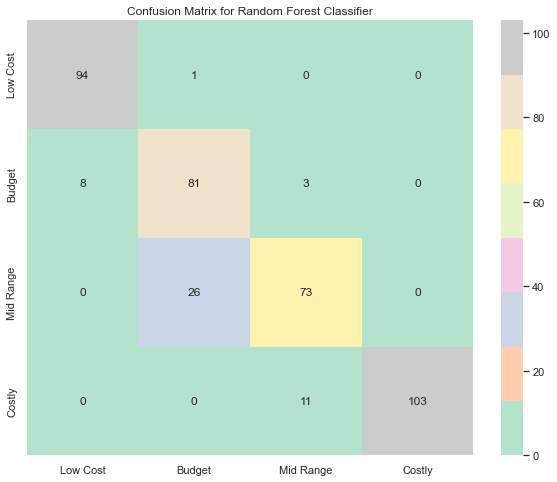

In [199]:
cm = confusion_matrix(y_test, y_pred_rf)
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budget", "Mid Range", "Costly"],index=["Low Cost", "Budget", "Mid Range", "Costly"])
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Pastel2")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

## Support Vector Machine 

In [201]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train,y_train)
y_pred_svm=svm_model.predict(x_test)
print("Support Vector Machine : Results")
SVM_result = classification_report(y_pred_svm,y_test,output_dict=True)
SVM_result = pd.DataFrame(SVM_result).transpose()
SVM_result.style.background_gradient(cmap="twilight_shifted")

Support Vector Machine : Results


,precision,recall,f1-score,support
0,0.957895,0.938144,0.947917,97.000000
1,0.891304,0.788462,0.836735,104.000000
2,0.818182,0.794118,0.805970,102.000000
3,0.850877,1.000000,0.919431,97.000000
accuracy,0.877500,0.877500,0.877500,0.877500
macro avg,0.879565,0.880181,0.877513,400.000000
weighted avg,0.879003,0.877500,0.875905,400.000000


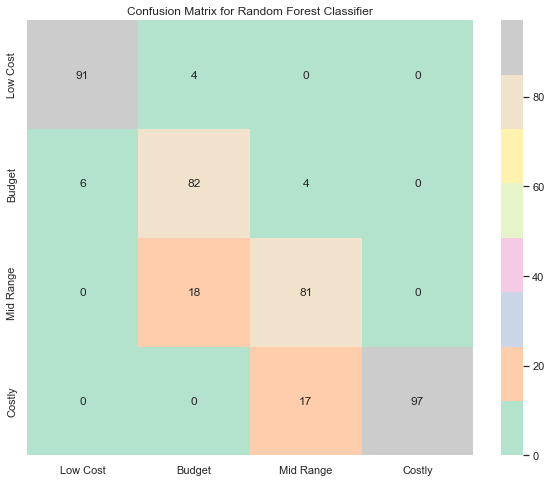

In [202]:
cm = confusion_matrix(y_test, y_pred_svm)
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budget", "Mid Range", "Costly"],index=["Low Cost", "Budget", "Mid Range", "Costly"])
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Pastel2")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

## K Nearest Neighbours Classifier 

In [211]:
from sklearn.neighbors import KNeighborsClassifier
values=[]
neighbors = np.arange(1,50)
for k in neighbors:
    knn_model =KNeighborsClassifier(n_neighbors=k , metric="minkowski")
    knn_model.fit(x_train,y_train)
    y_pred_knn=knn_model.predict(x_test)
    score= accuracy_score(y_test ,y_pred_knn)
    values.append(score)

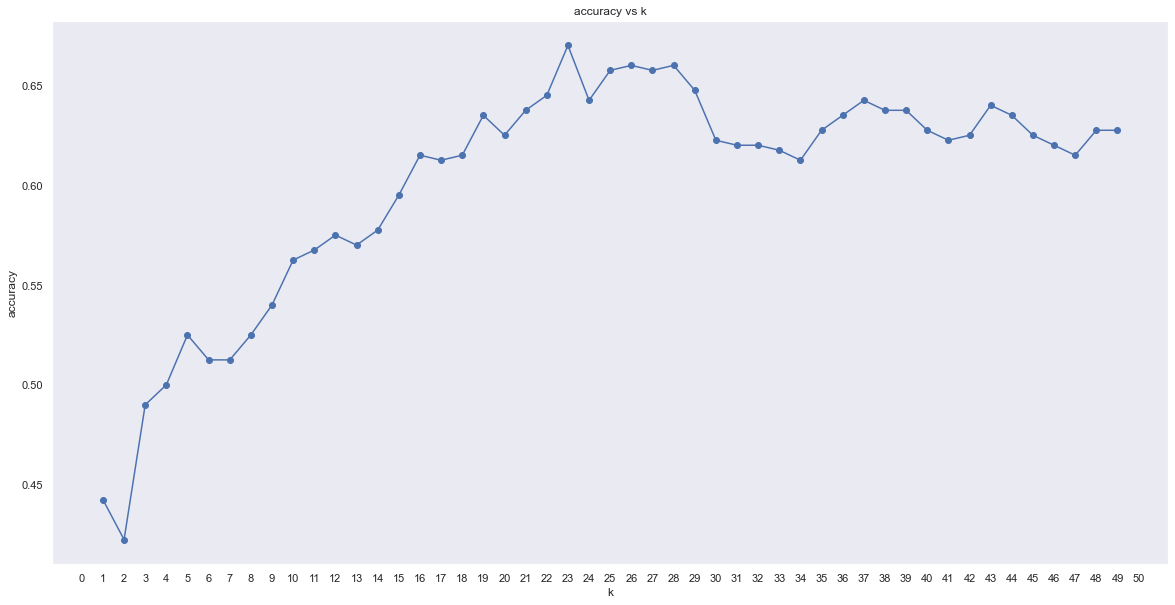

In [216]:
plt.figure(figsize=(20,10))
plt.plot(neighbors, values ,"o-", )
plt.title("accuracy vs k")
plt.xticks(np.arange(0.0,51.0 ,1.0))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.grid()
plt.show()

#### Highest accuracy was found for k = 23. This value will be used.

In [217]:
knn_model = KNeighborsClassifier(n_neighbors=23)  
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

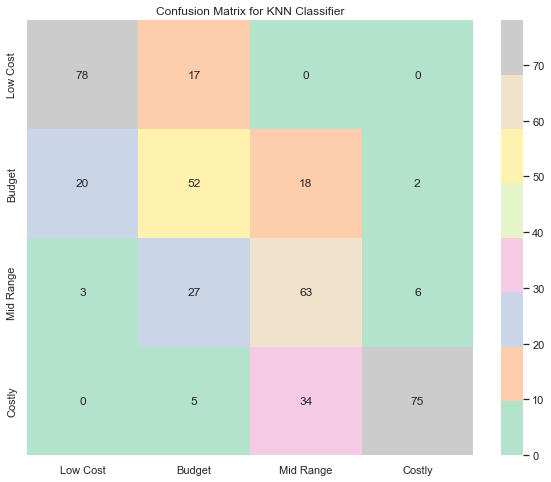

In [218]:
cm = confusion_matrix(y_test, y_pred_knn)
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budget", "Mid Range", "Costly"],index=["Low Cost", "Budget", "Mid Range", "Costly"])
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Pastel2")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()

In [219]:
print("KNN Classifier : Results")
KNN_result = classification_report(y_pred_knn,y_test,output_dict=True)
KNN_result = pd.DataFrame(KNN_result).transpose()
KNN_result.style.background_gradient(cmap="twilight_shifted")

KNN Classifier : Results


,precision,recall,f1-score,support
0,0.821053,0.772277,0.795918,101.000000
1,0.565217,0.514851,0.538860,101.000000
2,0.636364,0.547826,0.588785,115.000000
3,0.657895,0.903614,0.761421,83.000000
accuracy,0.670000,0.670000,0.670000,0.670000
macro avg,0.670132,0.684642,0.671246,400.000000
weighted avg,0.669501,0.670000,0.664302,400.000000


## Gradient Boosting Classifier 

In [221]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier()
gbc_model.fit(x_train,y_train)
y_pred_gbc = gbc_model.predict(x_test)
print("Gradient Boosting Classifier : Results")
GB_result = classification_report(y_pred_gbc,y_test,output_dict=True)
GB_result = pd.DataFrame(GB_result).transpose()
GB_result.style.background_gradient(cmap="twilight_shifted")

Gradient Boosting Classifier : Results


,precision,recall,f1-score,support
0,0.978947,0.939394,0.958763,99.000000
1,0.902174,0.798077,0.846939,104.000000
2,0.787879,0.795918,0.791878,98.000000
3,0.850877,0.979798,0.910798,99.000000
accuracy,0.877500,0.877500,0.877500,0.877500
macro avg,0.879969,0.878297,0.877094,400.000000
weighted avg,0.880477,0.877500,0.876931,400.000000


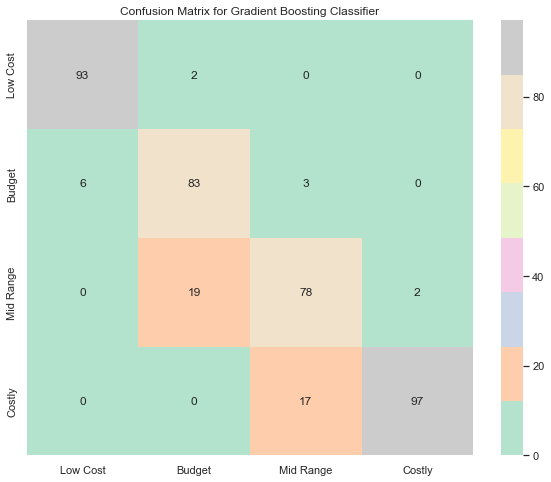

In [222]:
cm = confusion_matrix(y_test, y_pred_gbc)
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budget", "Mid Range", "Costly"],index=["Low Cost", "Budget", "Mid Range", "Costly"])
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Pastel2")
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

# Extreme Gradient Boosting Classifier

In [227]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred_xgb=xgb_model.predict(x_test)
print("Extreme Gradient Boosting Classifier : Results")
XGB_result = classification_report(y_pred_xgb,y_test,output_dict=True)
XGB_result = pd.DataFrame(XGB_result).transpose()
XGB_result.style.background_gradient(cmap="twilight_shifted")

Extreme Gradient Boosting Classifier : Results


,precision,recall,f1-score,support
0,0.989474,0.959184,0.974093,98.000000
1,0.923913,0.833333,0.876289,102.000000
2,0.808081,0.833333,0.820513,96.000000
3,0.885965,0.971154,0.926606,104.000000
accuracy,0.900000,0.900000,0.900000,0.900000
macro avg,0.901858,0.899251,0.899375,400.000000
weighted avg,0.902309,0.900000,0.899947,400.000000


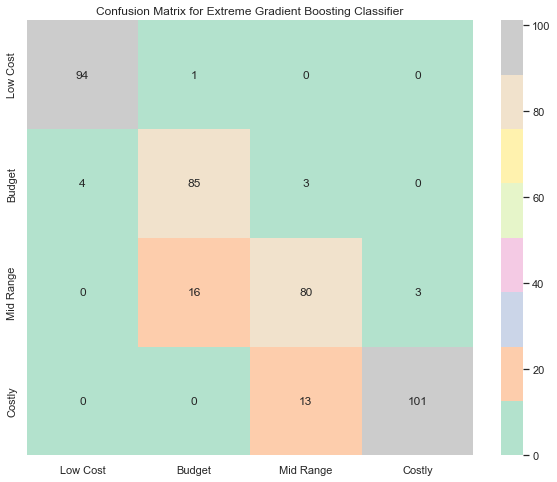

In [229]:
cm = confusion_matrix(y_test, y_pred_xgb)
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budget", "Mid Range", "Costly"],index=["Low Cost", "Budget", "Mid Range", "Costly"])
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Pastel2")
plt.title("Confusion Matrix for Extreme Gradient Boosting Classifier")
plt.show()

## Naive Bayes Classifier

In [230]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred_gnb = gnb_model.predict(x_test)

In [231]:
print("Gaussian Naive Bayes Classifier : Results")
gnb_result = classification_report(y_pred_gnb,y_test,output_dict=True)
gnb_result = pd.DataFrame(gnb_result).transpose()
gnb_result.style.background_gradient(cmap="twilight_shifted")

Gaussian Naive Bayes Classifier : Results


,precision,recall,f1-score,support
0,0.968421,0.929293,0.948454,99.000000
1,0.750000,0.726316,0.737968,95.000000
2,0.686869,0.673267,0.680000,101.000000
3,0.850877,0.923810,0.885845,105.000000
accuracy,0.815000,0.815000,0.815000,0.815000
macro avg,0.814042,0.813171,0.813067,400.000000
weighted avg,0.814599,0.815000,0.814244,400.000000


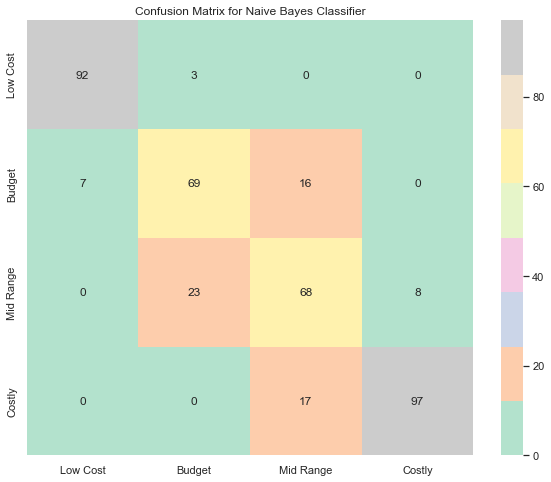

In [232]:
cm = confusion_matrix(y_test, y_pred_gnb)
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budget", "Mid Range", "Costly"],index=["Low Cost", "Budget", "Mid Range", "Costly"])
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Pastel2")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

#### Compare the accuracy scores of the above models to figure out which model has better accuracy.

In [234]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_gbc = accuracy_score(y_test, y_pred_gbc)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
acc_gnb = accuracy_score(y_test, y_pred_gnb)

In [235]:
ml_models = ['LR','DT','RF','SVM','KNN','GBC','XGB','GNB']
acc_scores = [acc_lr,acc_dt,acc_rf,acc_svm,acc_knn,acc_gbc,acc_xgb,acc_gnb]

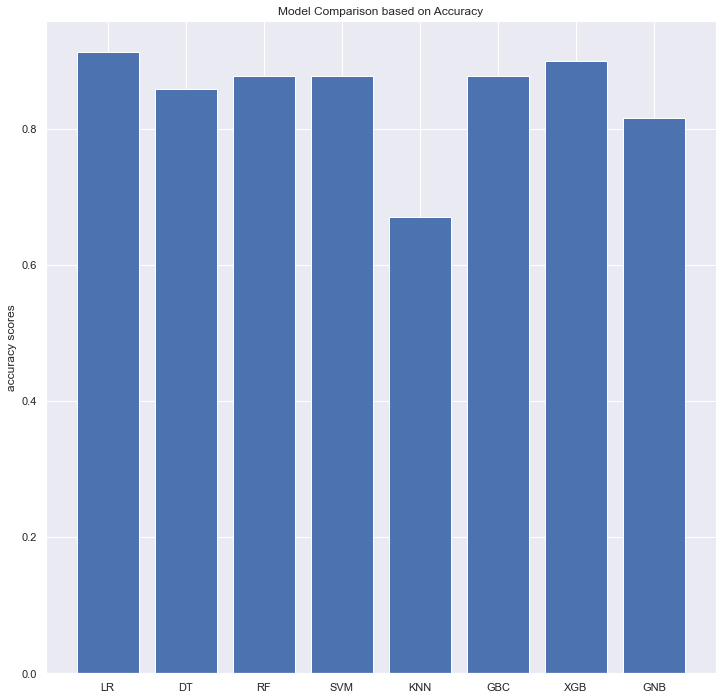

In [239]:
plt.rcParams['figure.figsize'] = (12,12)
plt.bar(ml_models, acc_scores )
plt.ylabel("accuracy scores")
plt.title("Model Comparison based on Accuracy")
plt.show()

#### From the above comparison it is clear that Logistic Regression model has the highest accuracy for the given problem. 

## Use test dataset to test the model 

In [240]:
data_test=pd.read_csv(r"C:\Users\Priya\Documents\Internship_TcsIon\MobileDataSets\MobileTest.csv", index_col="id")
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [245]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test = sc.fit_transform(data_test)


In [247]:
price_range_pred = lr_model.predict(test)
data_test['price_range'] = price_range_pred

In [248]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
id,,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,2
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
